### Objective
Build, train, and evaluate a CNN using Keras on CIFAR-10 To learn a model that correctly assigns each input image to exactly one of 10 predefined object classes.


**CIFAR-10 (Canadian Institute For Advanced Research)** is a benchmark image classification dataset widely used to evaluate Convolutional Neural Networks (CNNs) and other computer vision models.

It is designed to be:

- Small enough to train quickly

- Complex enough to demonstrate real-world image challenges

### Data Composition

| Attribute        | Description                          |
| ---------------- | ------------------------------------ |
| Total images     | **60,000**                           |
| Training images  | **50,000**                           |
| Test images      | **10,000**                           |
| Image size       | **32 × 32 pixels**                   |
| Color channels   | **3 (RGB)**                          |
| Classes          | **10**                               |
| Images per class | **6,000** (5,000 train + 1,000 test) |


### The dataset contains the following 10 mutually exclusive object categories:

Airplane, Automobile, Bird, Cat, Deer, Dog, Frog, Horse, Ship,Truck

### This mix intentionally includes:

- Animals (biological objects)

- Vehicles (man-made objects)


## Step 1: Load Dataset

In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
import matplotlib.pyplot as plt

(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print(x_train.shape, y_train.shape)

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 25s 0us/step
(50000, 32, 32, 3) (50000, 1)


## Step 2: Visualize Sample Images (Human View)

Before training any model, it is critical to **visually inspect the data**.
This helps confirm:
- Images are correctly loaded
- Labels match what humans perceive
- Data quality is acceptable

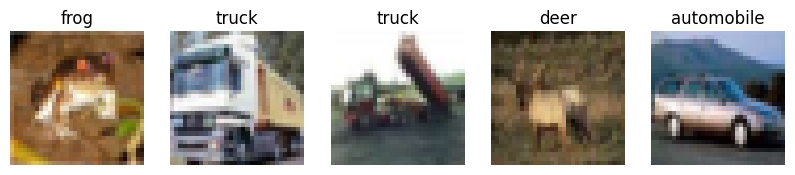

In [2]:
class_names = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

plt.figure(figsize=(10,4))
for i in range(5):
    plt.subplot(1,5,i+1)
    plt.imshow(x_train[i])
    plt.title(class_names[y_train[i][0]])
    plt.axis('off')
plt.show()

## Step 3: Data Preprocessing

In [3]:
x_train = x_train.astype('float32') / 255.0
x_test  = x_test.astype('float32') / 255.0

## Step 4: CNN Model Design

In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

model = Sequential([
 Conv2D(32,(3,3),activation='relu',input_shape=(32,32,3)),
 MaxPooling2D((2,2)),
 Conv2D(64,(3,3),activation='relu'),
 MaxPooling2D((2,2)),
 Flatten(),
 Dense(128,activation='relu'),
 Dense(10,activation='softmax')
])
model.summary()

C:\Users\Suyashi144893\AppData\Local\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 13, 13, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2304)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         295,040 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 315,722 (1.20 MB)

 Trainable params: 315,722 (1.20 MB)

 Non-trainable params: 0 (0.00 B)

## Step 5: Compile and Train

In [5]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.fit(x_train,y_train,epochs=10,batch_size=64,validation_split=0.1)

Epoch 1/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step - accuracy: 0.4713 - loss: 1.4763 - val_accuracy: 0.5736 - val_loss: 1.1962
Epoch 2/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 8s 11ms/step - accuracy: 0.6038 - loss: 1.1313 - val_accuracy: 0.6352 - val_loss: 1.0437
Epoch 3/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 8s 12ms/step - accuracy: 0.6544 - loss: 0.9925 - val_accuracy: 0.6668 - val_loss: 0.9771
Epoch 4/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 8s 11ms/step - accuracy: 0.6880 - loss: 0.8975 - val_accuracy: 0.6932 - val_loss: 0.9041
Epoch 5/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 8s 11ms/step - accuracy: 0.7138 - loss: 0.8240 - val_accuracy: 0.6942 - val_loss: 0.8921
Epoch 6/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 8s 11ms/step - accuracy: 0.7383 - loss: 0.7479 - val_accuracy: 0.6978 - val_loss: 0.8793
Epoch 7/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 8s 11ms/step - accuracy: 0.7616 - loss: 0.6823 - val_accuracy: 0.7048 - val_loss: 0.8695
Epoch 8/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 8s 11ms/step - accuracy: 0.7854 - loss: 0.6196 - val_accu

## Step 6: Evaluation

In [6]:
loss,acc = model.evaluate(x_test,y_test)
print('Test Accuracy:',acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7027 - loss: 0.9355
Test Accuracy: 0.7027000188827515


## Reflection
Why is visual inspection of data important before training a CNN?